### Support Vector Machines (SVM) Classification

<b>Support Vector Machines(SVMs)</b> is a supervised learning model that constructs the optimal hyperplane in multidimensional sapce which in turn acts as a decision boundary in order to linearly classify binary classes or multiclasses variables. The <b>Support Vectors</b> are the samples that are located nearest to the seperating hyperplanes or lie on the margin lines.

<b>How does the SVM model works?</b>

The SVM model will first construct the hyperplane to the unclassified dataset along with two margin lines. Then using the dot product method it will calculate the distance between the data point and the hyperplane. Then it will classify the data points by assigning negative and positive samples following the process below:

Let's assume the following:

X: Unlabeled data point(vector) that could belong to either of positive or negative class

W: Perpendicular distance between 0 to the hyperplane.

C: Decision boundary by hyperplane

Using vector dot products, the model will classify the samples based on the intuition below:

- If the dot product of X.W > C : Assign data point to Positive class
- If the dot product of X.W < C : Assign data point to Negative class
- If the dot product of X.W = C : Assign data point to Decision boundary

<u>Assumption: If dataset is linearly separable.</u>
- The goal of the model is to choose a hyperplane with the widest possible margin between the hyperplane and any support vector. The wider the margin between the two categories, the better the model will be at predicting the category for new records.


<p align="center">
<img src="https://i.imgur.com/OkjG4UQ.png" width="500" height="300" />
</p>

<u>Assumption: If dataset is not linearly separable.</u>

If the dataset is NOT linearly separable, then we need to apply the Kernel trick method. Essentially, the kernel trick projects the original data points in a higher dimensional space in order to make them linearly separable. The kernel-SVM computes the decision boundary in terms of similarity measures in a high-dimensional feature space without actually doing the projection. Some famous kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid kernels.


<p align="center">
<img src="https://i.imgur.com/YVlI1jf.png" width="500" height="300" />
</p>


Terminologies:
- <b>Hyperplane</b>: a 1-dimension subspace for an N-dimensional space.
- <b>SVM Margin</b>: The distance between the hyperplane and the nearest data points(samples)
- <b>Soft margin</b>: Allows some samples to be misclassified or be on the wrong side of the decision boundary allowing highly generalized model. A soft margin SVM solves the following optimization problem:

1. Increase the distance of decision boundary to the support vectors (i.e. the margin) 

2. Maximize the number of points that are correctly classified in the training set.


https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/#:~:text=Margin%20in%20Support%20Vector%20Machine&text=x%2Bb%3D0%20where%20w,and%20b%20is%20an%20offset.&text=If%20the%20value%20of%20w,margin%20has%20a%20maximum%20distance.


https://ankitnitjsr13.medium.com/math-behind-support-vector-machine-svm-5e7376d0ee4d

#worklow

-Visualize the target variable and check for linearity > Hyperparameter Tuning > Apply a specific Kernel based on Linearity assumption > Set parameter for regularization > Run Prediction

#notebook
https://www.kaggle.com/prashant111/svm-classifier-tutorial
https://medium.com/mlearning-ai/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-with-f373a3b439ab

#### Loan Default Problem Statement

This analysis takes into consideration features such as fico scores, interest rates etc, to predict whether we can lend funds to a client using the SVM classification technique.

Feature variables:
- credit.policy: 1 if the customer meets the credit underwriting criteria of [LendingClub.com](http://lendingclub.com/), and 0 otherwise.
- purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by [LendingClub.com](http://lendingclub.com/) to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

Target Variable:
- Not fully paid (yes/no)

#### Data Extraction

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,hinge_loss,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [89]:
df= pd.read_csv('/users/kunalramchurn/Desktop/all scripts/data/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [23]:
print('Presence of missing values: \n',df.isnull().any())

Presence of missing values: 
 credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
Purpose en           False
dtype: bool


#### Exploratory Data Analysis


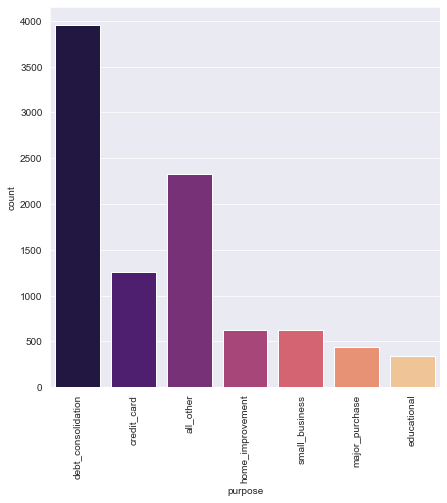

In [41]:
plt.figure(figsize=[7,7])
plt.xticks(rotation = 90)
sns.countplot('purpose',data=df,palette='magma');

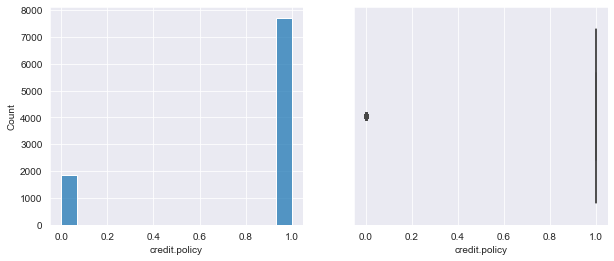

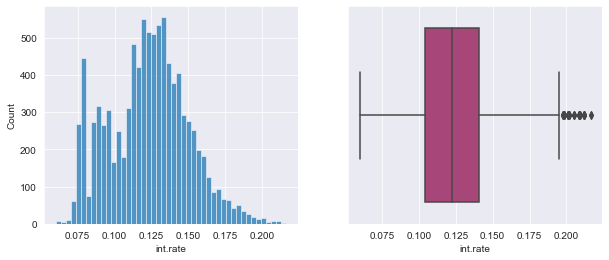

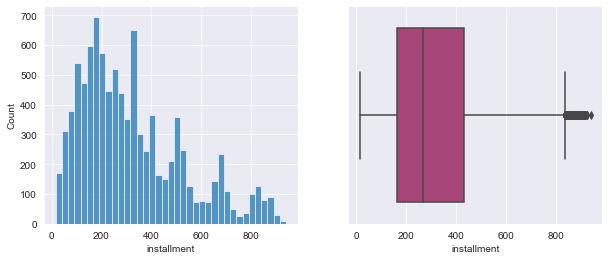

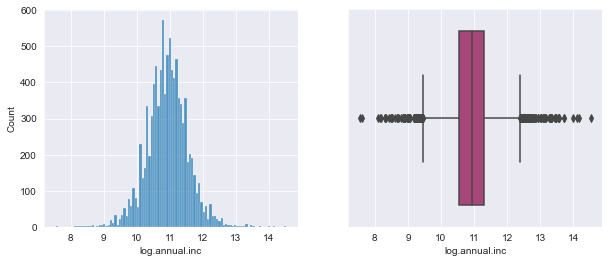

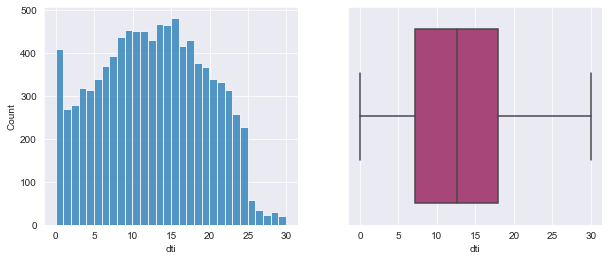

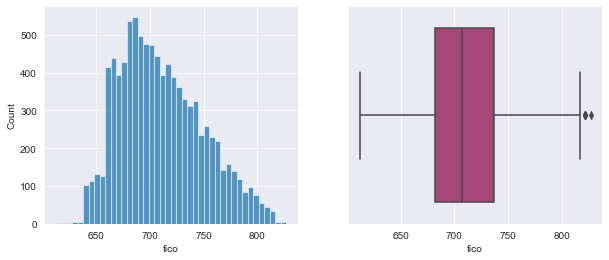

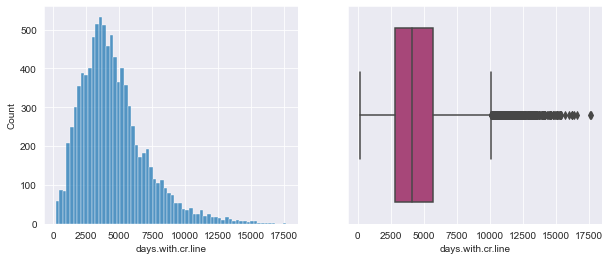

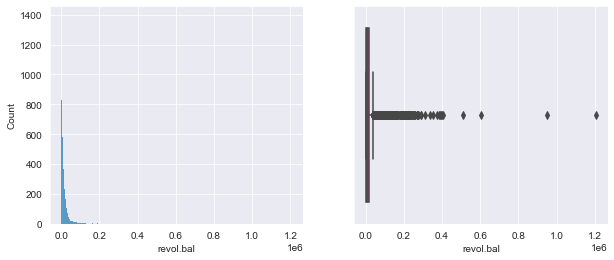

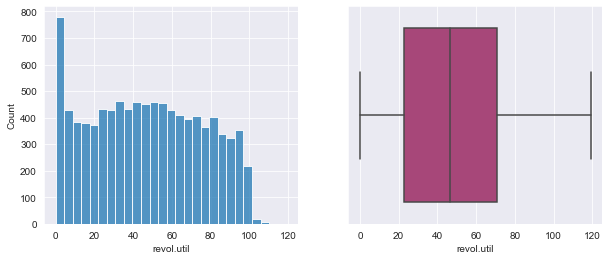

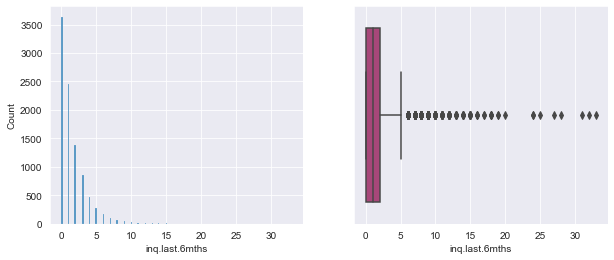

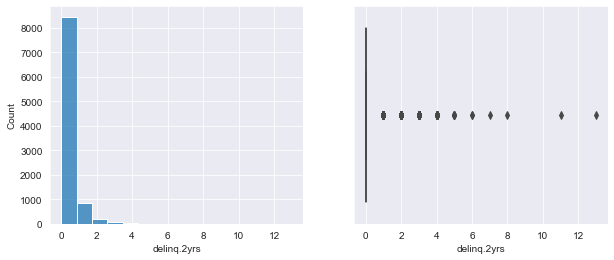

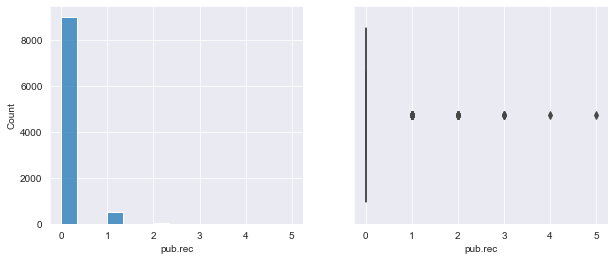

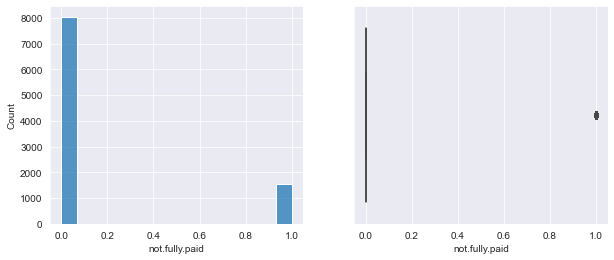

In [90]:
numerical = df.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    sns.histplot(data=df, x=col, ax=ax[0],palette='magma')
    sns.boxplot(data=df, x=col, ax=ax[1],palette='magma');

Class Imbalance

Paid 83.99 % of the dataset
Not paid 16.01 % of the dataset


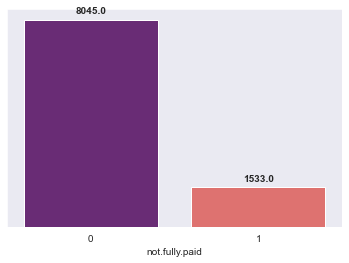

In [91]:
ax=sns.countplot(df['not.fully.paid'],palette='magma');
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',weight='bold')
ax.axes.yaxis.set_visible(False)
print('Paid', round(df['not.fully.paid'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Not paid', round(df['not.fully.paid'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

There is presence of heavy class imbalance for the target variable. Further below, we will use oversampling technique to balance both classes.

In [31]:
df.corr().round(2)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,Purpose en
credit.policy,1.00,-0.29,0.06,0.03,-0.09,0.35,0.10,-0.19,-0.10,-0.54,-0.08,-0.05,-0.16,0.02
int.rate,-0.29,1.00,0.28,0.06,0.22,-0.71,-0.12,0.09,0.46,0.20,0.16,0.10,0.16,0.12
installment,0.06,0.28,1.00,0.45,0.05,0.09,0.18,0.23,0.08,-0.01,-0.00,-0.03,0.05,0.15
log.annual.inc,0.03,0.06,0.45,1.00,-0.05,0.11,0.34,0.37,0.05,0.03,0.03,0.02,-0.03,0.09
dti,-0.09,0.22,0.05,-0.05,1.00,-0.24,0.06,0.19,0.34,0.03,-0.02,0.01,0.04,-0.05
fico,0.35,-0.71,0.09,0.11,-0.24,1.00,0.26,-0.02,-0.54,-0.19,-0.22,-0.15,-0.15,0.06
days.with.cr.line,0.10,-0.12,0.18,0.34,0.06,0.26,1.00,0.23,-0.02,-0.04,0.08,0.07,-0.03,0.05
revol.bal,-0.19,0.09,0.23,0.37,0.19,-0.02,0.23,1.00,0.20,0.02,-0.03,-0.03,0.05,0.04
revol.util,-0.10,0.46,0.08,0.05,0.34,-0.54,-0.02,0.20,1.00,-0.01,-0.04,0.07,0.08,-0.06
inq.last.6mths,-0.54,0.20,-0.01,0.03,0.03,-0.19,-0.04,0.02,-0.01,1.00,0.02,0.07,0.15,0.04


#### Feature Scaling, Engineering

In [55]:
labelencoder= LabelEncoder()
df['Purpose en']=labelencoder.fit_transform(df.purpose)

In [56]:
X=df.drop(['not.fully.paid','purpose'],axis=1)
y= df["not.fully.paid"]

In [34]:
chc=SelectKBest(score_func=chi2,k=13)
chc.fit(X,y)
features_score_pvalue=pd.DataFrame({"Score":chc.scores_,"P_Value":np.round(chc.pvalues_,5)},index=X.columns)
features_score_pvalue.nlargest(n=13,columns="Score")

,Score,P_Value
revol.bal,1.860498e+06,0.00000
days.with.cr.line,1.119078e+04,0.00000
installment,3.211572e+03,0.00000
revol.util,1.160848e+03,0.00000
inq.last.6mths,6.564686e+02,0.00000
fico,4.351062e+02,0.00000
dti,5.025229e+01,0.00000
credit.policy,4.670311e+01,0.00000
Purpose en,3.217312e+01,0.00000
pub.rec,2.505498e+01,0.00000


In [57]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.25,random_state=42)

In [58]:
sm = SMOTE(random_state=42)
smx_train, smy_train = sm.fit_resample(X_train, y_train)

In [59]:
print(smx_train.shape)
print(smy_train.shape)

(12066, 13)
(12066,)


#### Model Deployment

#scatterplot for non-linearly seperable data

In [73]:
#hyperparameter tuning 

param_grid = {'C' : [0.1,1,10],'gamma': [1,10,100],'kernel': ['rbf']}

grid = GridSearchCV(SVC(),param_grid,cv=2,verbose=1)
grid.fit(smx_train,smy_train)
print(grid.best_estimator_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
SVC(C=10, gamma=1)


https://towardsdatascience.com/how-to-learn-non-linear-separable-dataset-with-support-vector-machines-a7da21c6d987

The <b>RBF(Radial Basis Function) Kernel</b> creates a non-linear combinations of the features to project the samples onto a higher-dimensional feature space in order to create a linear decision boundary to separate the 2 classes.
insert rbf formula

1. ‘σ’ is the variance and our hyperparameter
2. ||X₁ – X₂|| is the Euclidean Distance between two points X₁ and X₂

C is a hyperparameter in SVM to control error. Low C(lower error) better than high C(higher error). Its best for linear and Polynomial Kernel. Values range between 0 and 100.

C : If C is small, the penalty for misclassified data points is low, so a decision boundary with a large margin is chosen at the expese of a greater number of misclassifications.
If C is large, SVM tries to minimize the number of misclassified samples and results in a decision boundary with a smaller margin.

Gamma is a hyperparameter that decides how much curvature we want in a decision boundary.

- High gamma: more curvature, the points need to be very close to each other in order for it to be considered in the same group.
- Low Gamma: less curvature, indicate a large similarity radius which results in more points being grouped together.  Values range between 0 and 100. Best for the RBF kernel

<p align="center">
<img src="https://i.imgur.com/qpecDfK.png" width="700" height="400" />
</p>

In [82]:
classifier = SVC(kernel ='rbf',gamma=0.01,random_state=1)
classifier.fit(smx_train,smy_train)

SVC(gamma=0.01, random_state=1)

#### Model Evaluation

In [83]:
y_pred= classifier.predict(X_test)
print('accuracy score on training set: {:.2f}%'.format(classifier.score(smx_train,smy_train)*100))
print('accuracy score on testing set: {:.2f}%'.format(accuracy_score(y_test,y_pred) *100))

accuracy score on training set: 64.06%
accuracy score on testing set: 63.84%


<AxesSubplot:>

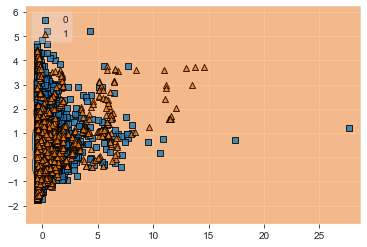

In [41]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(smx_train, smy_train.values, clf=classifier, legend=2);

In [84]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Confusion Matrix:
 [[1295  717]
 [ 149  234]]


In [85]:
print('Classification Report:\n',classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.64      0.75      2012
           1       0.25      0.61      0.35       383

    accuracy                           0.64      2395
   macro avg       0.57      0.63      0.55      2395
weighted avg       0.79      0.64      0.69      2395



The <b>hinge loss</b> is a loss function used for binary classification to compute the average distance between the model and the data.


<p align="center">
<img src="https://i.imgur.com/illJEOP.png" width="500" height="300" />
</p>



Formula:
c: loss function
x; feature
y: true label
f(x): predicted label

the loss is 0, if $y∗f(x)$ are positive, respective both values have the same sign.
loss is $1−y∗f(x)$ if $y∗f(x)$ is negative


$c(x, y, f(x)) = (1 - y * f(x))$

In [86]:
hinge_loss(y_test,y_pred)

1.201670146137787

https://www.youtube.com/watch?v=PM2MSAYmzXM

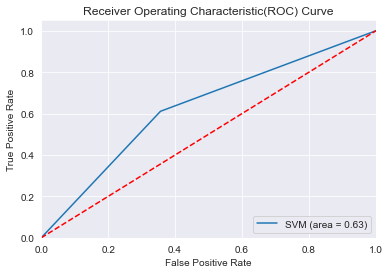

In [87]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Model Interpretation

In [ ]:
#additional code
#def log_loss(raw_model_output):
    #return np.log(1 + np.exp(-raw_model_output))
#def hinge_loss(raw_model_output):
    #return np.maximum(0, 1 - raw_model_output)

# Create a grid of values and plot
#grid = np.linspace(-2,2,1000)
#plt.plot(grid, log_loss(grid), label='logistic');
#plt.plot(grid, hinge_loss(grid), label='hinge');
#plt.axvline(x=0, linestyle='dashed', color='k')
#plt.legend();

https://github.com/christianversloot/machine-learning-articles/blob/main/using-radial-basis-functions-for-svms-with-python-and-scikit-learn.md